In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

def Graph_Confusion_Matrix(CM, labels):
    #np.fill_diagonal(CM,0)

    plt.figure(figsize = (5,5))
    sn.set(font_scale=1.4)#for label size
    sn.heatmap(CM, annot=True,annot_kws={"size": 16}, fmt='g'
               ,xticklabels = labels
               ,yticklabels = labels)# font size
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
class anomaly_detection():
    
    def __init__(self, df_X):
         self.df_X = df_X
        
         m,n = df_X.values.shape

         self.sigma = np.zeros((n,n))
         self.mu = np.zeros((n))

    def Guassion_Parameters(self):
        ##
        #Obtain the mean and covariance matrix need for the Guassian curve
        ##
        X = self.df_X.values
        X_mean = X.mean(axis=0)
        
        m, n = X.shape # number of training examples, number of features
        
        #Creates the covariance Matrix
        Sigma = np.dot((X - X_mean).T, (X - X_mean))
        
        Sigma = Sigma * (1.0/m)
        
        self.mu = X_mean
        self.sigma = Sigma


    def multivariateGaussian(self, df_X):
        ##
        #Calculates the P-Value based on the parameters found above.
        #This is the vectorised form of the equation.
        ##
        
        X = df_X
        
        m, n = X.shape # number of training examples, number of features
    
        X = X.values - self.mu.reshape(1,n) # (X - mu)
    
        # vectorized implementation of calculating p(x) for each m examples: p is m length array
        p = (1.0 / (math.pow((2 * math.pi), n / 2.0) * math.pow(np.linalg.det(self.sigma),0.5))) * np.exp(-0.5 * np.sum(X.dot(np.linalg.pinv(self.sigma)) * X, axis=1))
    
        return p

    def Best_Epsilon(self, Yval ,Pred):
        ##
        #Obtains the best epsilon when the F1 score is maxamised.
        ##
        
        
        bestF1 = 0
        bestEpsilon = 0
    
        stepsize = (max(Pred) - min(Pred)) / 1000
        for epsilon in np.arange(min(Pred), max(Pred), stepsize):
            
            predictions = (Pred < epsilon).astype(int)
            
            F1 = f1_score(Yval, predictions)
            
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon = epsilon
                
        return(bestEpsilon, bestF1)

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['creditcard.csv']


In [2]:
df = pd.read_csv("../input/creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site

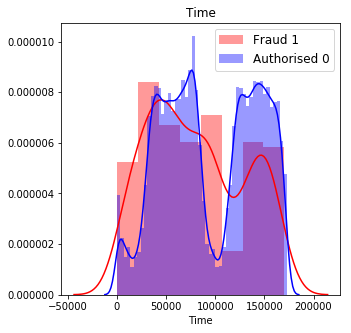

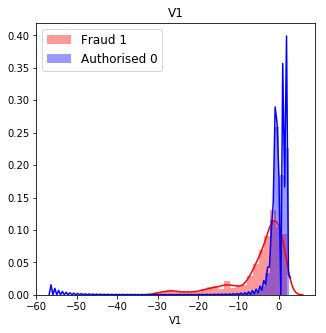

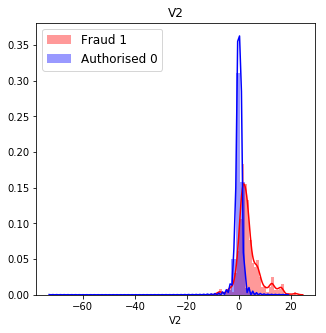

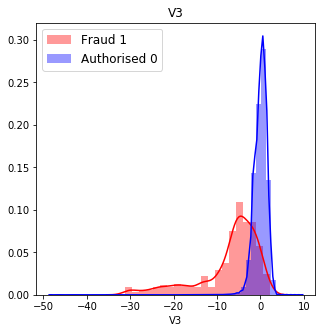

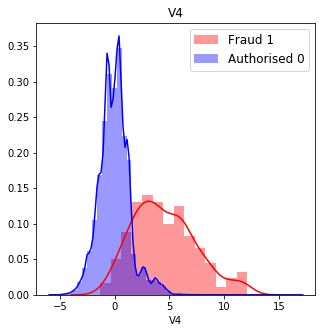

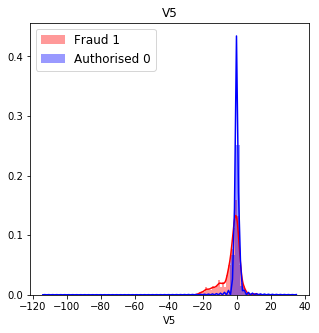

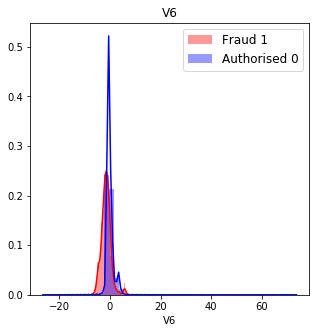

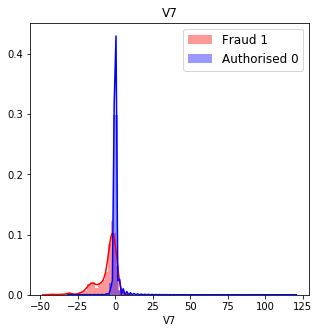

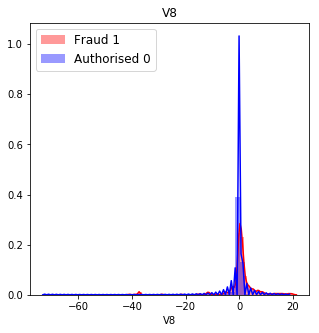

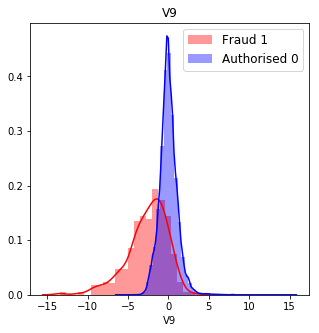

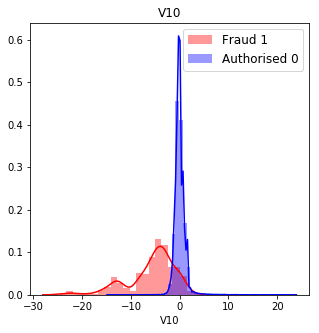

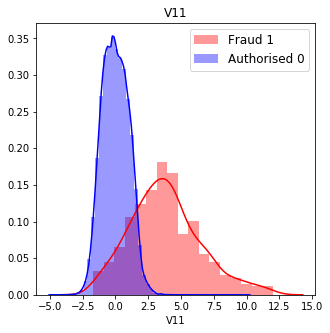

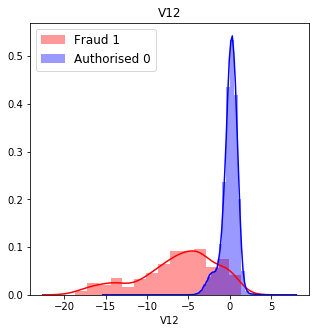

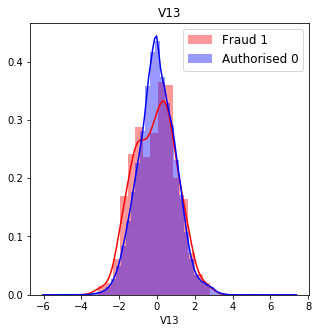

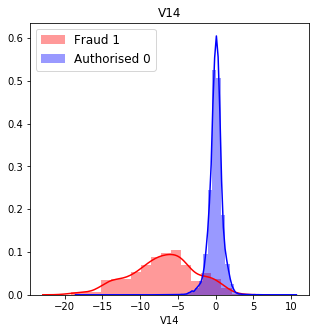

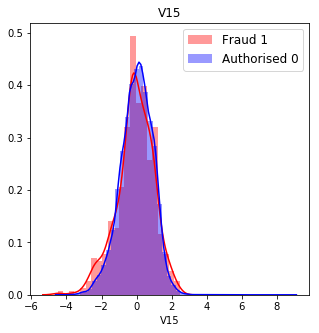

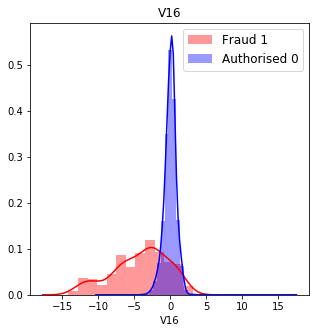

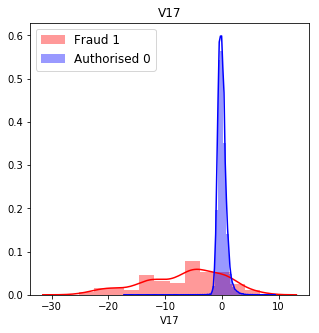

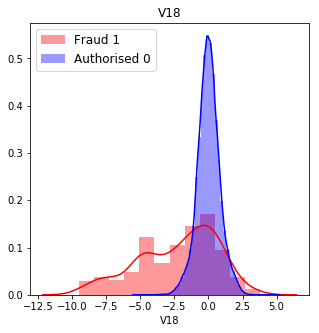

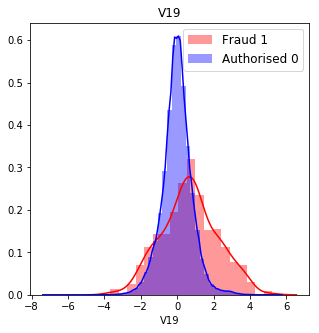

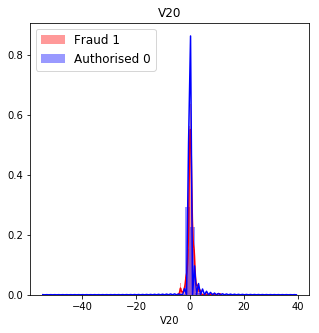

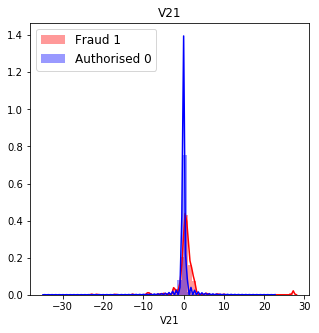

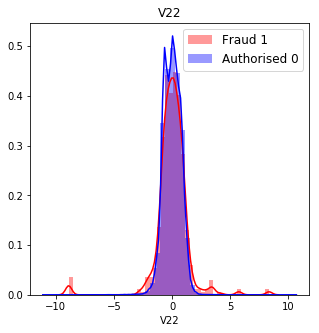

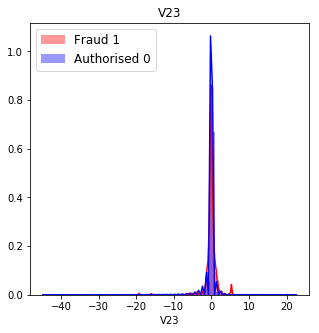

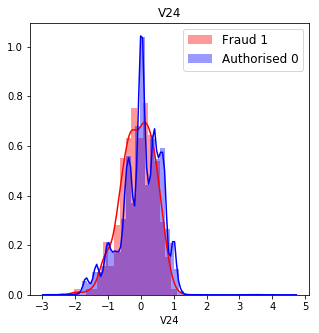

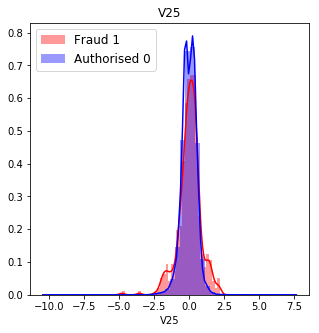

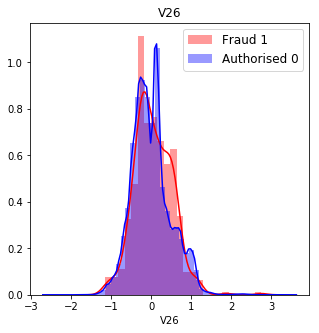

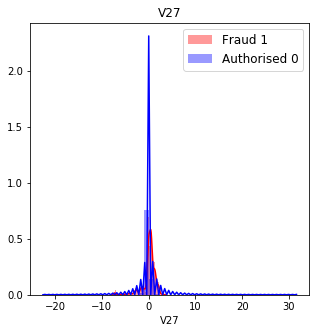

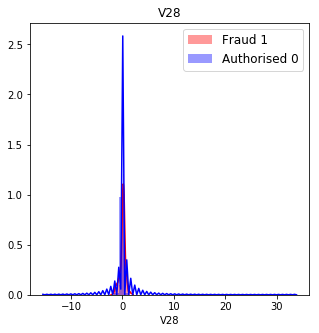

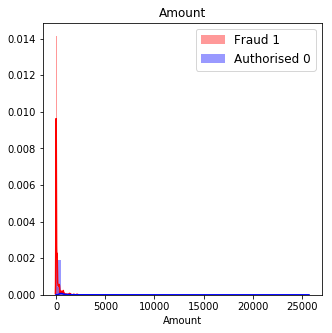

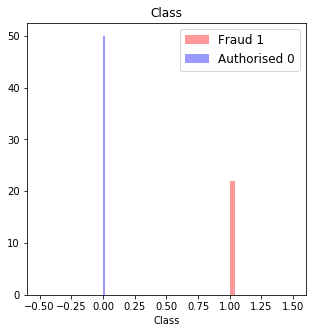

In [3]:
%matplotlib inline

for i, col in enumerate(df.columns):
    plt.figure(i, figsize=(5,5))
    sn.distplot(df[col].loc[df['Class'] == 1], color="red" ,label="Fraud 1")
    sn.distplot(df[col].loc[df['Class'] == 0], color="blue" ,label="Authorised 0")
    plt.legend(fontsize=12)
    plt.title(col, fontsize= 12)
    #print(i,col)

We want to select features that have different PDF's such as V16 and V17 but there are other. The code below shows all the features I have selected.

In [4]:
df_base = df[["Class", "V3", "V4", "V10", "V11", "V12" , "V14" , "V16", "V17", "V18"]] 

Below the loop creates a model for each feature then outputs the corresponding confusion matrix and F1 score.

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


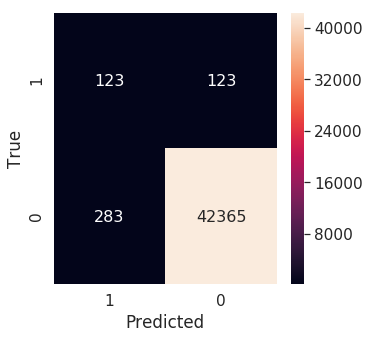

Columns Name:  Index(['Class', 'V3'], dtype='object')
F1 Score:  0.3773006134969325


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


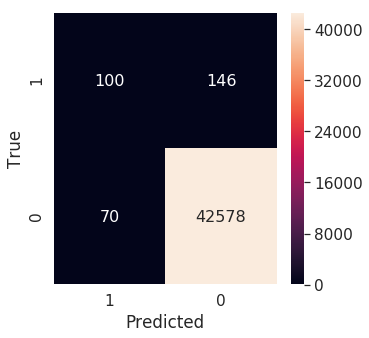

Columns Name:  Index(['Class', 'V4'], dtype='object')
F1 Score:  0.4807692307692308


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


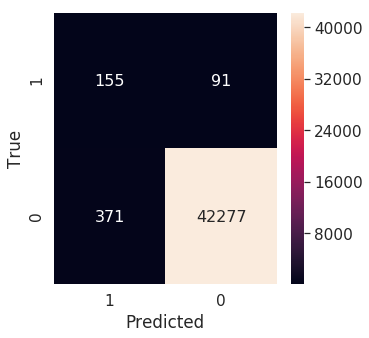

Columns Name:  Index(['Class', 'V10'], dtype='object')
F1 Score:  0.40155440414507776


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


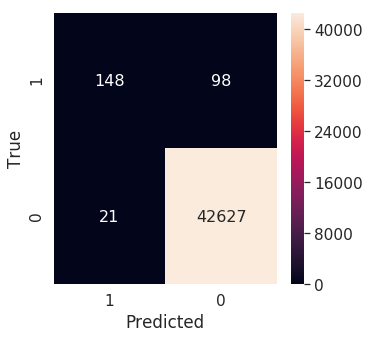

Columns Name:  Index(['Class', 'V11'], dtype='object')
F1 Score:  0.7132530120481928


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


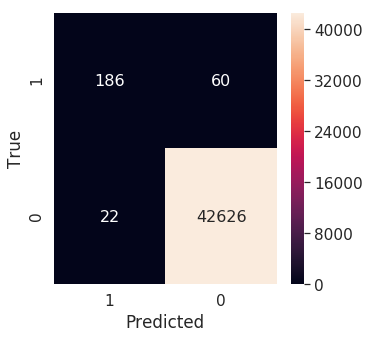

Columns Name:  Index(['Class', 'V12'], dtype='object')
F1 Score:  0.8193832599118943


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


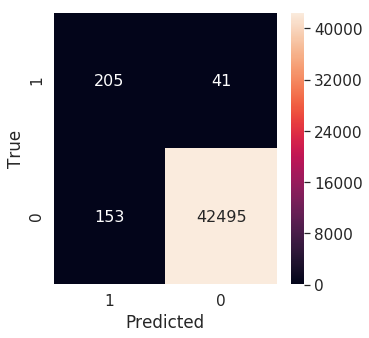

Columns Name:  Index(['Class', 'V14'], dtype='object')
F1 Score:  0.6788079470198676


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


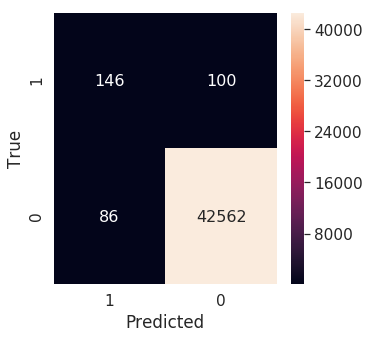

Columns Name:  Index(['Class', 'V16'], dtype='object')
F1 Score:  0.6108786610878661


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


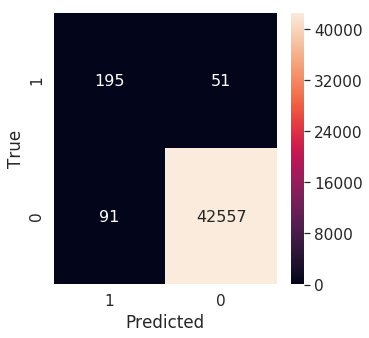

Columns Name:  Index(['Class', 'V17'], dtype='object')
F1 Score:  0.7330827067669172


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


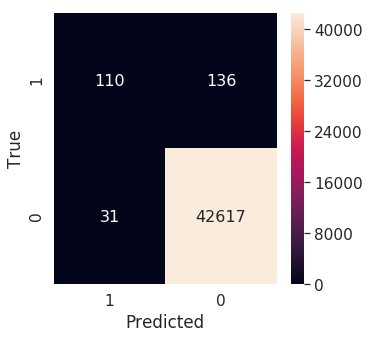

Columns Name:  Index(['Class', 'V18'], dtype='object')
F1 Score:  0.5684754521963824


In [5]:
#Seporates the two classes
df_fraud = df_base.loc[df["Class"] == 1]
df_authorised = df_base.loc[df["Class"] == 0]

#Resets the index
df_fraud = df_fraud.reset_index(drop=True)
df_authorised = df_authorised.reset_index(drop=True)

#splits into three groups
train, test, validation = np.split(df_authorised, [int(0.7* len(df_authorised)),int(0.85* len(df_authorised)) ])
post_V, post_T = np.split(df_fraud ,2)

test = test.append(post_T).sample(frac=1).reset_index(drop=True)
validation = validation.append(post_V).sample(frac=1).reset_index(drop=True)

for i in range (1,len(df_base.columns)):
        
    model_1 = anomaly_detection(train.iloc[:,[0,i]].drop(["Class"], axis=1))
    
    #Fits the model
    model_1.Guassion_Parameters()

    pred_Val = model_1.multivariateGaussian(validation.iloc[:,[0,i]].drop(["Class"], axis=1))

    #Use validation data to find the best threshold for P Value
    best_E, Best_F1 = model_1.Best_Epsilon(validation["Class"], pred_Val)

    yval = validation["Class"]


    CM_Val = confusion_matrix(yval,  (pred_Val < best_E).astype(int), [1,0])
    Graph_Confusion_Matrix(CM_Val, [1,0])
    print("Columns Name: ", train.iloc[:,[0,i]].columns)
    print("F1 Score: ",Best_F1)

Features V12 and V17 have the best and 2nd best F1 score respectivily.

Lets try creating a model with both these features:

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


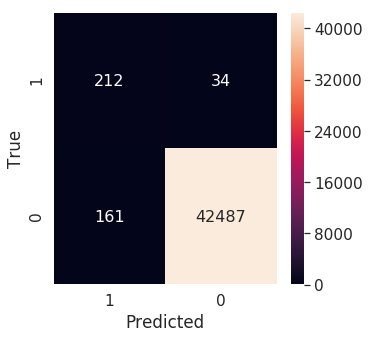

Columns Name:  Index(['Class', 'V18'], dtype='object')
F1 Score:  0.6849757673667206


In [6]:
model_1 = anomaly_detection(train[["V12", "V17"]])

#Fits the model
model_1.Guassion_Parameters()

pred_Val = model_1.multivariateGaussian(validation[["V12", "V17"]])

#Use validation data to find the best threshold for P Value
best_E, Best_F1 = model_1.Best_Epsilon(validation["Class"], pred_Val)

yval = validation["Class"]


CM_Val = confusion_matrix(yval,  (pred_Val < best_E).astype(int), [1,0])
Graph_Confusion_Matrix(CM_Val, [1,0])
print("Columns Name: ", train.iloc[:,[0,i]].columns)
print("F1 Score: ",Best_F1)

Although the F1 score is worse this model does detect more fraud transactions.

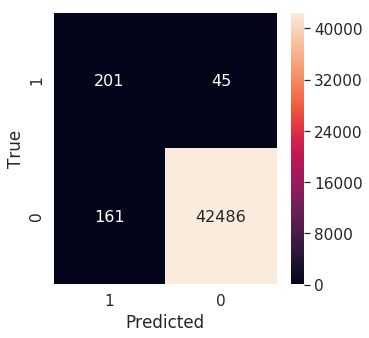

In [7]:
pred_Test = model_1.multivariateGaussian(test[["V12", "V17"]])

ytest = test["Class"]
CM_Test = confusion_matrix(ytest,  (pred_Test < best_E).astype(int),  [1,0])
Graph_Confusion_Matrix(CM_Test,  [1,0])
